# Dataset 1

In [1]:
from scipy.stats import dweibull as dw
%matplotlib inline
%pylab inline
import numpy as np
from ipywidgets import interact,IntSlider, FloatSlider
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def n_experiment(n):
    count=0
    for i in range(n):
        out1= np.random.randint(1,9)
        out2= np.random.randint(1,13)
        out3= np.random.randint(1,21)
        if out1+out2==out3:
            count+=1
        else:
            pass    
    return count/n 

In [3]:
def repeat_exp(n_repeat, exp, *args):
    results2 = []
    for i in range(n_repeat):
        results2.append(exp(*args))
    return results2

In [4]:
dataset_1=repeat_exp(1000,n_experiment,1000)

In [5]:
true_mean=np.mean(dataset_1)
true_std=np.std(dataset_1,ddof=1)
print("Mean of the Dataset = {:.4f}".format(true_mean))
print("Standard Deviation of the Dataset ={:.4f}".format(true_std))

Mean of the Dataset = 0.0498
Standard Deviation of the Dataset =0.0066


Text(0, 0.5, 'Data Values')

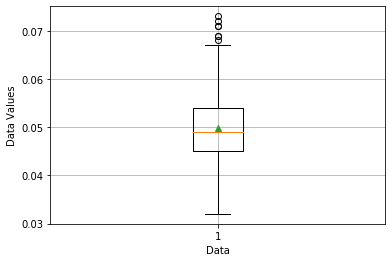

In [6]:
plt.boxplot(dataset_1,showmeans=True)
plt.grid()
plt.xlabel("Data")
plt.ylabel("Data Values")


# Sampling Data

In [7]:
def Sample_from_data(data,sample_l):
    a=len(data)
    sample=np.zeros(sample_l)
    
    for i_sample in range(sample_l):
        sample[i_sample]=data[np.random.randint(a)]
    mean_sample=np.mean(sample)
    std_sample=np.std(sample)
    return mean_sample, std_sample
n_samples = 40 
mean_sample, std_sample = Sample_from_data(dataset_1, n_samples)
print("Sample and True mean = {}, {}".format(mean_sample, true_mean)) 
print("Sample and True standard deviation = {}, {}".format(std_sample,true_std))

Sample and True mean = 0.049025, 0.049760000000000006
Sample and True standard deviation = 0.007610806461867231, 0.006626636576145723


In [43]:
M=100
def different_iteration(M,n,dataset):
    sample_mean = np.zeros(M)
    
    for i_sample in range(M):
        a=Sample_from_data(dataset,n)
        sample_mean[i_sample]=a[0]
        
    return sample_mean

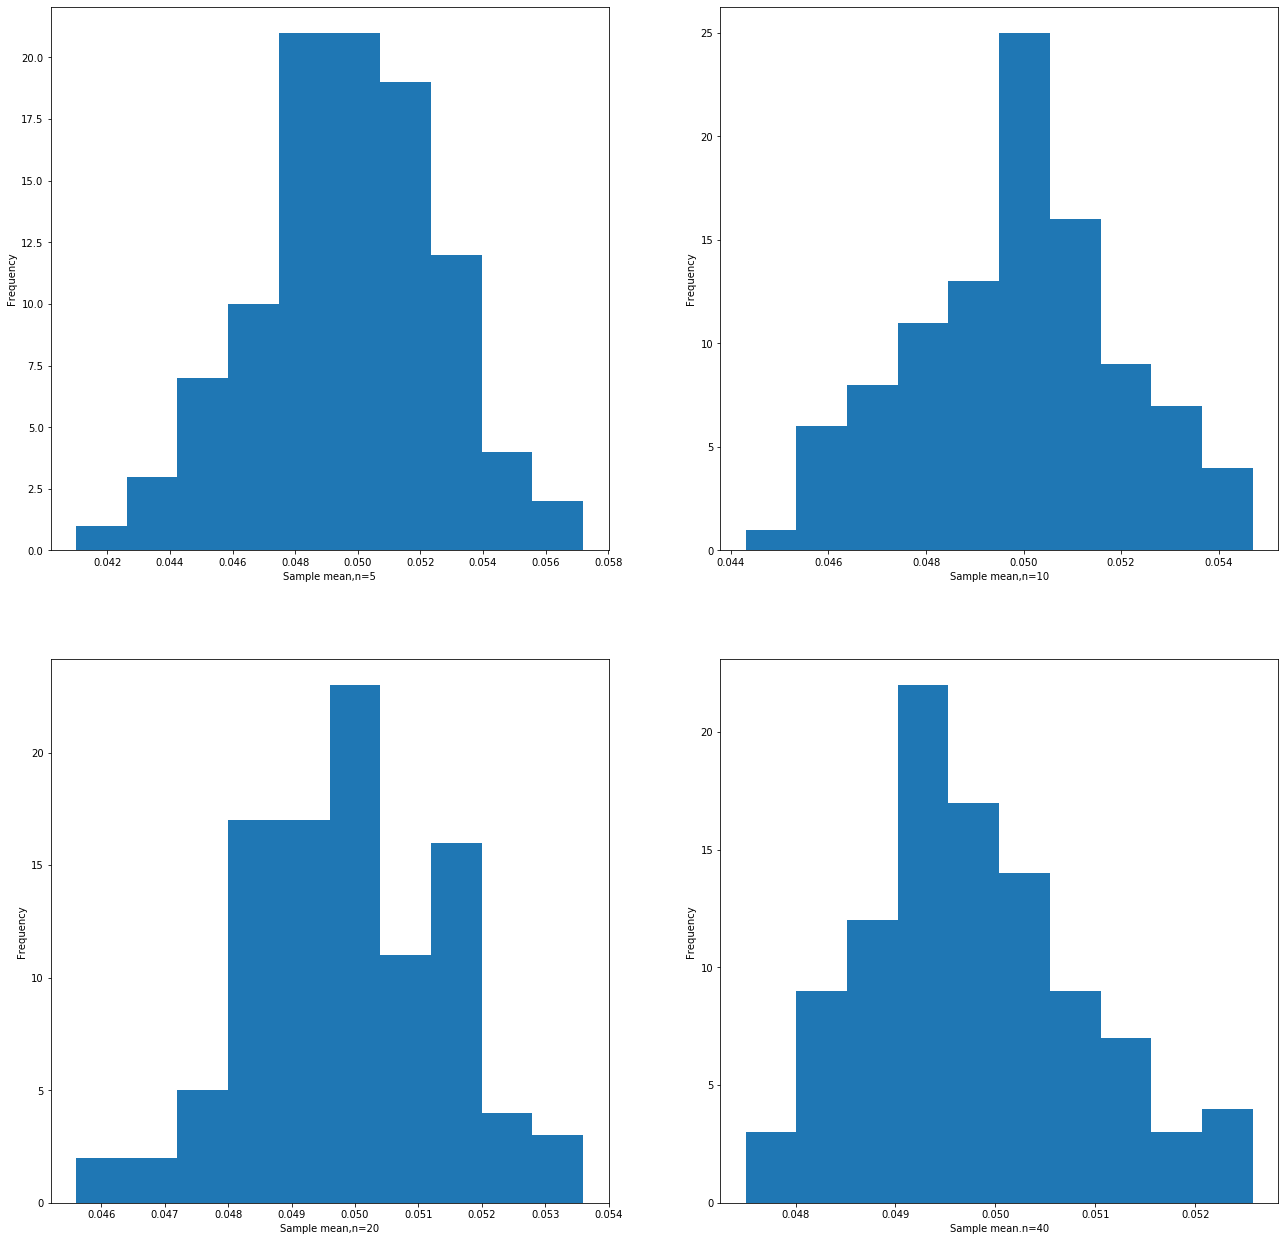

In [44]:
figure(figsize=(22,22))
subplot(2,2,1)
plt.xlabel('Sample mean,n=5') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,5,dataset_1));
subplot(2,2,2)
plt.xlabel('Sample mean,n=10') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,10,dataset_1));
subplot(2,2,3)
plt.xlabel('Sample mean,n=20') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,20,dataset_1));
subplot(2,2,4)
plt.xlabel('Sample mean.n=40') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,40,dataset_1));

In [10]:
 def plot_density(data, x_lo, x_hi, n_hist):
    dx = (x_hi - x_lo)/n_hist 
    x_hist = np.linspace(x_lo, x_hi, (n_hist + 1), endpoint=True) 
    plt.hist(data, bins=x_hist,color='g', weights=np.ones_like(data)/(data.size*dx));


In [60]:
from scipy.stats import norm ,t
def Z_function(M,n,dataset):
    sample_mean=different_iteration(M,n,dataset)
    tr_mean=np.mean(dataset)
    tr_std=np.std(dataset,ddof=1)  
    x_mean_lo = -3.5
    x_mean_hi = 3.5 
    nx_mean = 20
    rv = t(n-1)
    x = np.linspace(-5, 5, 200)
    z_expt = np.sqrt(n)*(sample_mean - tr_mean)/tr_std
    plot_density(z_expt, x_mean_lo, x_mean_hi, nx_mean)
    plt.plot(x, norm.pdf(x), 'b--',lw=3,label="Normal Distribution")
    plt.legend(loc='best')
    plt.plot(x, rv.pdf(x),'r',lw=3,label="T Disrtibution")
    plt.legend(loc='best')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f$') 

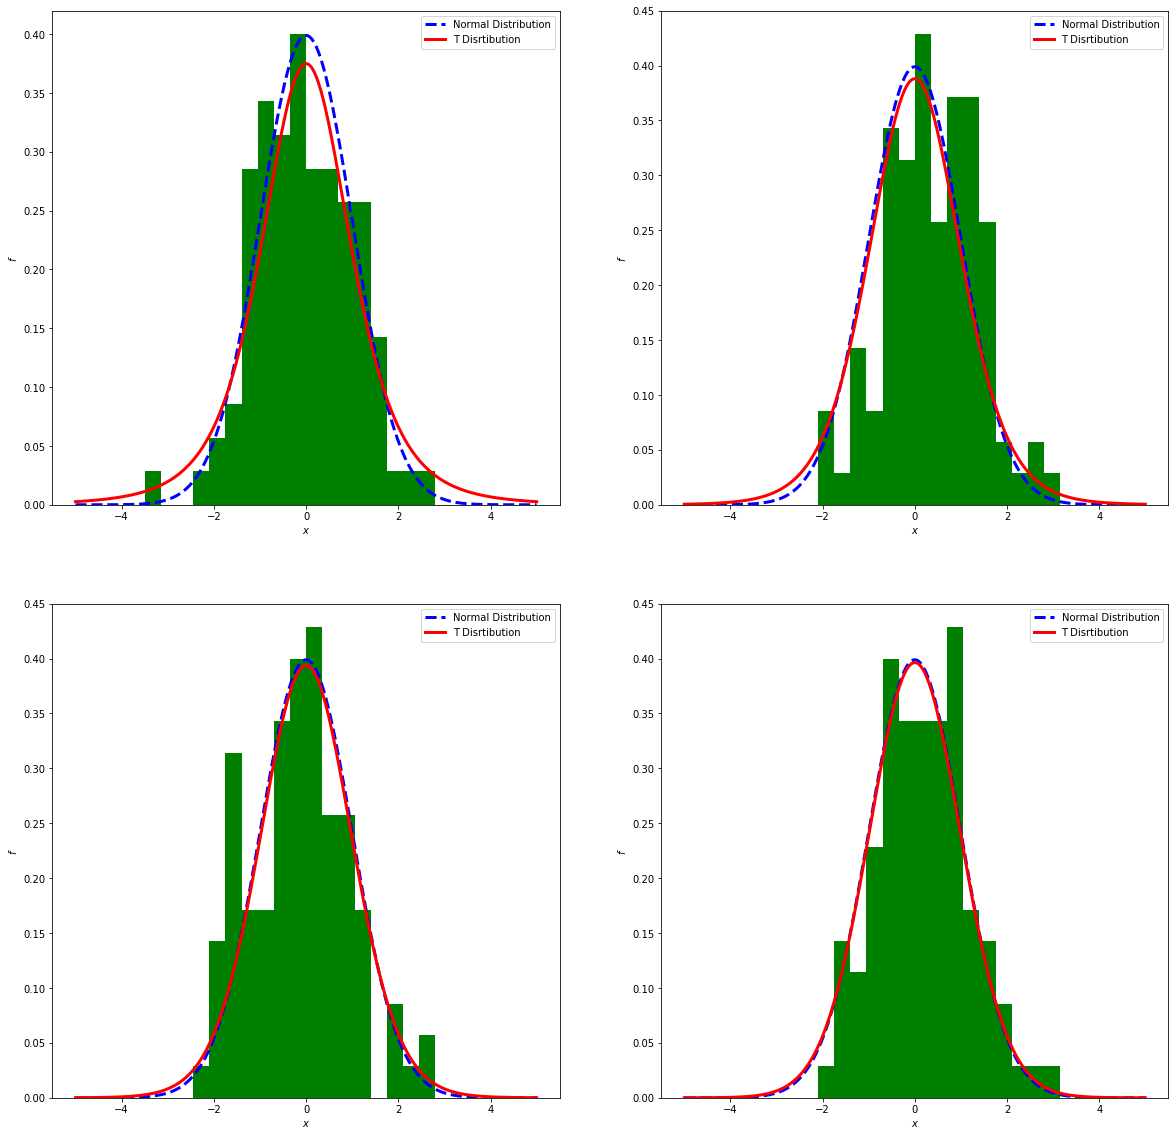

In [57]:
M=100

figure(figsize=(20,20))
subplot(2,2,1)
Z_function(M,5,dataset_1)
subplot(2,2,2)
Z_function(M,10,dataset_1)
subplot(2,2,3)
Z_function(M,20,dataset_1)
subplot(2,2,4)
Z_function(M,40,dataset_1)

# Confidence Intervals

In [63]:
from scipy.stats import t,norm
def confidence_intervals(ci_percent,n_sample,dataset):
    value_ci=ci_percent/100
    alpha = 1.0 - value_ci 
    ppf_arg = 1.0 - 0.5*alpha

    rv=t(n_sample-1)
    sample=Sample_from_data(dataset,n_sample)
    CI= rv.ppf(ppf_arg)*sample[1]/np.sqrt(n_sample)
    CI_approx = norm.ppf(ppf_arg)*sample[1]/np.sqrt(n_sample)
    print("for n = {}".format(n_sample))
    print("{}% confidence interval of the mean: {:.4f} +- {:.4f}".format(ci_percent, sample[0], CI))
    print("Approximate {}% confidence interval of the mean: {:.4f} +- {:.4f}".format(ci_percent, sample[0], CI_approx))

    

In [65]:
confidence_intervals(80,5,dataset_1)
confidence_intervals(80,10,dataset_1)
confidence_intervals(80,20,dataset_1)
confidence_intervals(80,40,dataset_1)

for n = 5
80% confidence interval of the mean: 0.0474 +- 0.0034
Approximate 80% confidence interval of the mean: 0.0474 +- 0.0029
for n = 10
80% confidence interval of the mean: 0.0510 +- 0.0029
Approximate 80% confidence interval of the mean: 0.0510 +- 0.0027
for n = 20
80% confidence interval of the mean: 0.0505 +- 0.0023
Approximate 80% confidence interval of the mean: 0.0505 +- 0.0022
for n = 40
80% confidence interval of the mean: 0.0504 +- 0.0016
Approximate 80% confidence interval of the mean: 0.0504 +- 0.0016


In [66]:
confidence_intervals(95,5,dataset_1)
confidence_intervals(95,10,dataset_1)
confidence_intervals(95,20,dataset_1)
confidence_intervals(95,40,dataset_1)

for n = 5
95% confidence interval of the mean: 0.0458 +- 0.0059
Approximate 95% confidence interval of the mean: 0.0458 +- 0.0042
for n = 10
95% confidence interval of the mean: 0.0520 +- 0.0051
Approximate 95% confidence interval of the mean: 0.0520 +- 0.0045
for n = 20
95% confidence interval of the mean: 0.0511 +- 0.0030
Approximate 95% confidence interval of the mean: 0.0511 +- 0.0028
for n = 40
95% confidence interval of the mean: 0.0483 +- 0.0020
Approximate 95% confidence interval of the mean: 0.0483 +- 0.0019


In [67]:
confidence_intervals(99,5,dataset_1)
confidence_intervals(99,10,dataset_1)
confidence_intervals(99,20,dataset_1)
confidence_intervals(99,40,dataset_1)

for n = 5
99% confidence interval of the mean: 0.0452 +- 0.0074
Approximate 99% confidence interval of the mean: 0.0452 +- 0.0041
for n = 10
99% confidence interval of the mean: 0.0505 +- 0.0080
Approximate 99% confidence interval of the mean: 0.0505 +- 0.0063
for n = 20
99% confidence interval of the mean: 0.0499 +- 0.0045
Approximate 99% confidence interval of the mean: 0.0499 +- 0.0040
for n = 40
99% confidence interval of the mean: 0.0507 +- 0.0023
Approximate 99% confidence interval of the mean: 0.0507 +- 0.0022


For a fixed value of n as the pecentage of confidence interval
increases the length of the confidence interval also increases.
when we increse the value of n the length of confidence interval 
decreases . it is expected as the confidence interval is 
inversally proportional to the square root of the value of n

# Box plot Discussion

Box plot is one of the convenient way to understand how a data is distributed. The orange line that you see is the median of the data values. The lower and upper edges of the box tells what the 25th and 75th percentile are. The difference between the 75th and 25th percentile is called the interquartile range.

In [111]:
def confidence_range(ci_percent,n_sample,dataset):
    value_ci=ci_percent/100
    alpha = 1.0 - value_ci 
    ppf_arg = 1.0 - 0.5*alpha

    rv=t(n_sample-1)
    sample=Sample_from_data(dataset,n_sample)
    CI= rv.ppf(ppf_arg)*sample[1]/np.sqrt(n_sample)
    CI_approx = norm.ppf(ppf_arg)*sample[1]/np.sqrt(n_sample)
    print('range of mean ({},{})in {} ci'.format(sample[0]-CI,sample[0]+CI,ci_percent))
    

In [108]:
percentile_25, median_data, percentile_75 = np.percentile(dataset_1, [25, 50, 75]) 
print("Median of dataset = {}".format(median_data))
print("25th and 75th percentile of dataset = {}, {}".format(percentile_25,percentile_75))
iqr_data = percentile_75 - percentile_25 
print("Interquartile range of dataset = {}".format(iqr_data))


Median of dataset = 0.049
25th and 75th percentile of dataset = 0.045, 0.054
Interquartile range of dataset = 0.009000000000000001


In [114]:
confidence_range(80,20,dataset_1)
confidence_range(90,20,dataset_1)
confidence_range(99,20,dataset_1)

range of mean (0.04670501971108361,0.05049498028891641)in 80 ci
range of mean (0.047866870025371475,0.05383312997462854)in 90 ci
range of mean (0.04735576452997777,0.05474423547002224)in 99 ci


As the percentage of confidence interval increases the range of mean increases and when we computed 99 percent confidence interval the  limits of the range are the 25 and 75 percentile of the dataset. We can say the whole range lies between the 25 and 75 percentile whether it is 80 percent or 90 percent or 99 percent

# Verifying CI

In [78]:
def verify_CI(M,n_sample,ci_percent,dataset):
    value_ci=ci_percent/100
    alpha = 1.0 - value_ci 
    ppf_arg = 1.0 - 0.5*alpha
    good=0
    gooday=0
    rv=t(n_sample-1)
    tr_mean=np.mean(dataset)
    tr_std=np.std(dataset,ddof=1)
    for i_sample in range(M):
        a=Sample_from_data(dataset,n_sample)
        ci_expt = rv.ppf(ppf_arg)*a[1]/np.sqrt(n_sample)
        CI_approx = norm.ppf(ppf_arg)*a[1]/np.sqrt(n_sample)
        if tr_mean >= (a[0] - ci_expt) and tr_mean <=(a[0] + ci_expt):
            good += 1
        if tr_mean >= (a[0] - CI_approx) and tr_mean <=(a[0] + CI_approx):
            gooday += 1
    good /= M
    gooday/=M
    print("Fraction of experiments where true mean lies in {}% confidence interval ={}".format(ci_percent,good))
    print("Fraction of experiments where true mean lies in approximate {}% confidence interval ={}".format(ci_percent,gooday))

In [79]:
verify_CI(100,40,80,dataset_1)
verify_CI(100,40,95,dataset_1)
verify_CI(100,40,99,dataset_1)

Fraction of experiments where true mean lies in 80% confidence interval =0.82
Fraction of experiments where true mean lies in approximate 80% confidence interval =0.8
Fraction of experiments where true mean lies in 95% confidence interval =0.95
Fraction of experiments where true mean lies in approximate 95% confidence interval =0.94
Fraction of experiments where true mean lies in 99% confidence interval =0.99
Fraction of experiments where true mean lies in approximate 99% confidence interval =0.98


Yes it is true when we approximate the confidence intervals the results are same

# Dataset 2

In [125]:
dataset_2=[0,265,472,698,785,1781,1477,1755,2010,2127,2603,2838,3239,3915,3721,3173,3437,2676,3001,2546,2035,14153,5151,2662,2097,2132,2003,1852,516,977,996,978,554,882,741,992,1288,1507,1990,1980,1862,2571,2306,3094,3641,4058,3897,4436,4572,7317,8261,10935,10988,13033,12941,15784,20743,26197,30728,29510,32493,41645,43924,48774,61133,64907,66931,60683,64481,74266,77508,80517,84490,81864,70973,73346,78659,84912,85559,92296,79729,71761,70495,73437,83114,81099,85332,80735,75685,73761,75691,80337,85039,102184,90506,73626,69625,75643,80056,86189,95341,83130,82553,79670,81701,96149,96710,96872,89573,80332,75023,85866,89898,97410,100718,97128,82644,90483,95795,103440,108417,108758,100537,97366,90874,93495,107553,117626,126754,125052,109801,105508,116306,121332,131299,131340,129632,114642,108519,121785,136772,139018,143421,134982,124457,125633,143566,146111,140528]
# the data is being taken from the source code of the webpage

In [32]:
true_mean_2=np.mean(dataset_2)
true_std_2=np.std(dataset_2,ddof=1)
print("Mean of the Dataset = {:.4f}".format(true_mean_2))
print("Standard Deviation of the Dataset ={:.4f}".format(true_std_2))

Mean of the Dataset = 57515.4631
Standard Deviation of the Dataset =47323.7595


Text(0, 0.5, 'Data Values')

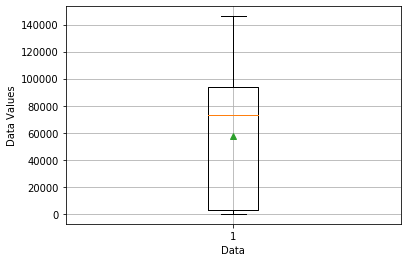

In [35]:
plt.boxplot(dataset_2,showmeans=True)
plt.grid()
plt.xlabel("Data")
plt.ylabel("Data Values")


# Sampling Data

In [42]:
n_samples = 40 
mean_sample_2, std_sample_2 = Sample_from_data(dataset_2, n_samples)
print("Sample and True mean = {}, {}".format(mean_sample_2, true_mean_2)) 
print("Sample and True standard deviation = {}, {}".format(std_sample_2,true_std_2))

Sample and True mean = 56948.775, 57515.463087248325
Sample and True standard deviation = 49107.31409244834, 47323.75948953433


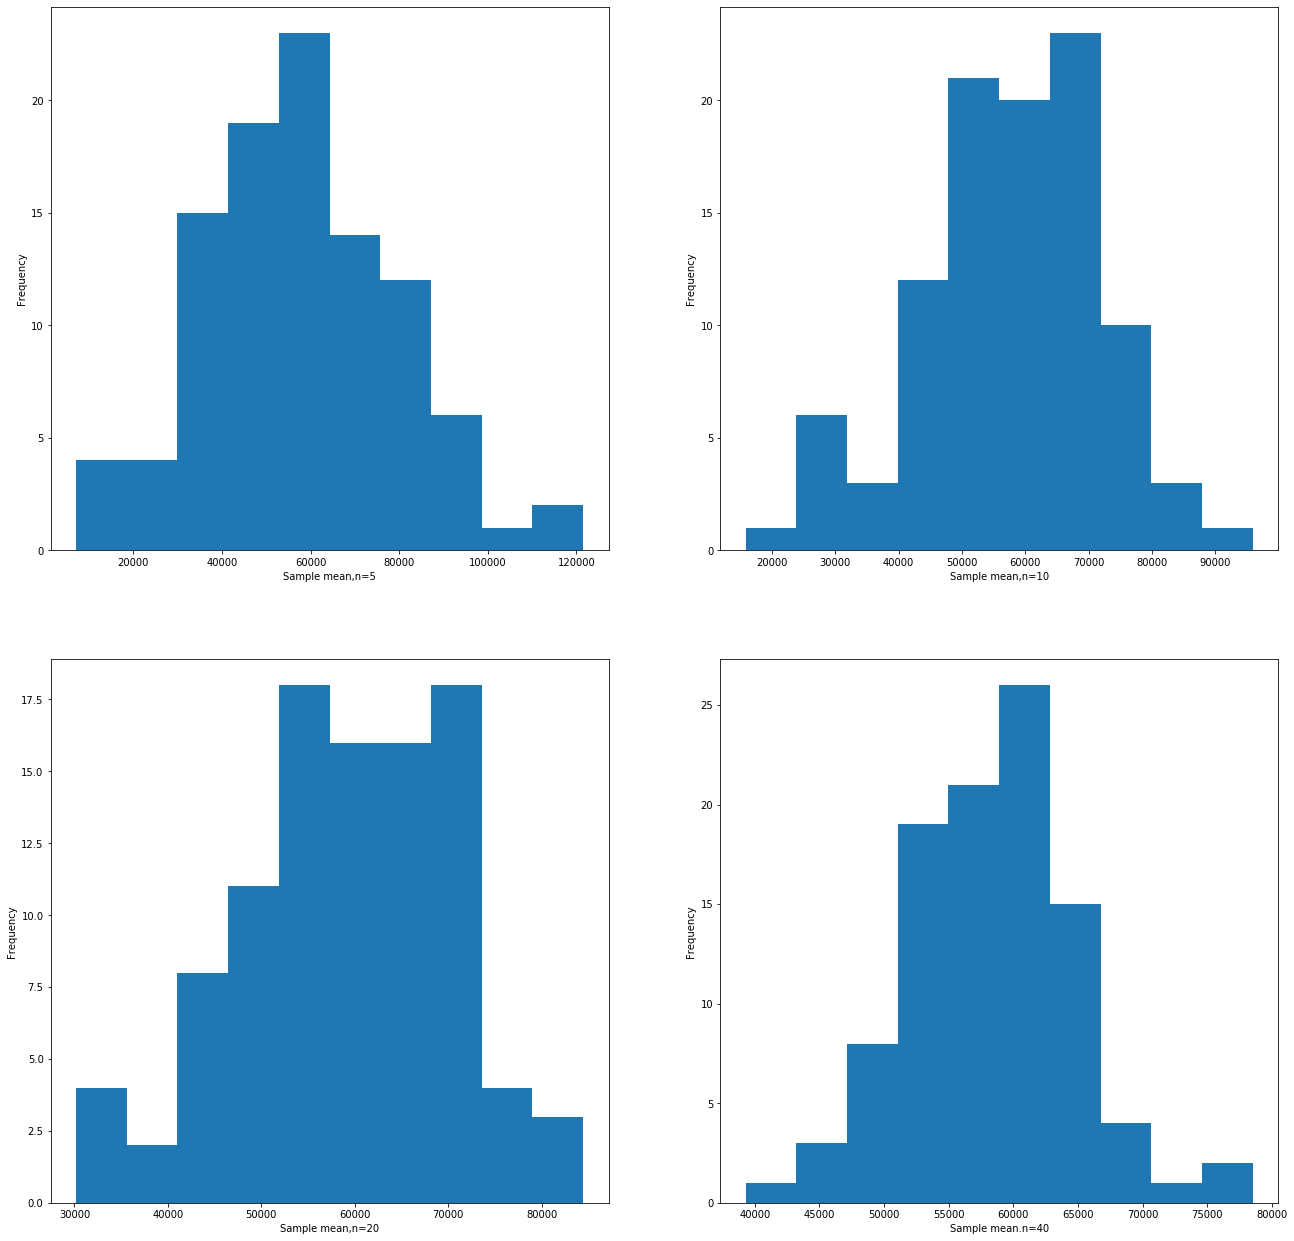

In [48]:
figure(figsize=(22,22))
subplot(2,2,1)
plt.xlabel('Sample mean,n=5') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,5,dataset_2));
subplot(2,2,2)
plt.xlabel('Sample mean,n=10') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,10,dataset_2));
subplot(2,2,3)
plt.xlabel('Sample mean,n=20') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,20,dataset_2));
subplot(2,2,4)
plt.xlabel('Sample mean.n=40') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,40,dataset_2));

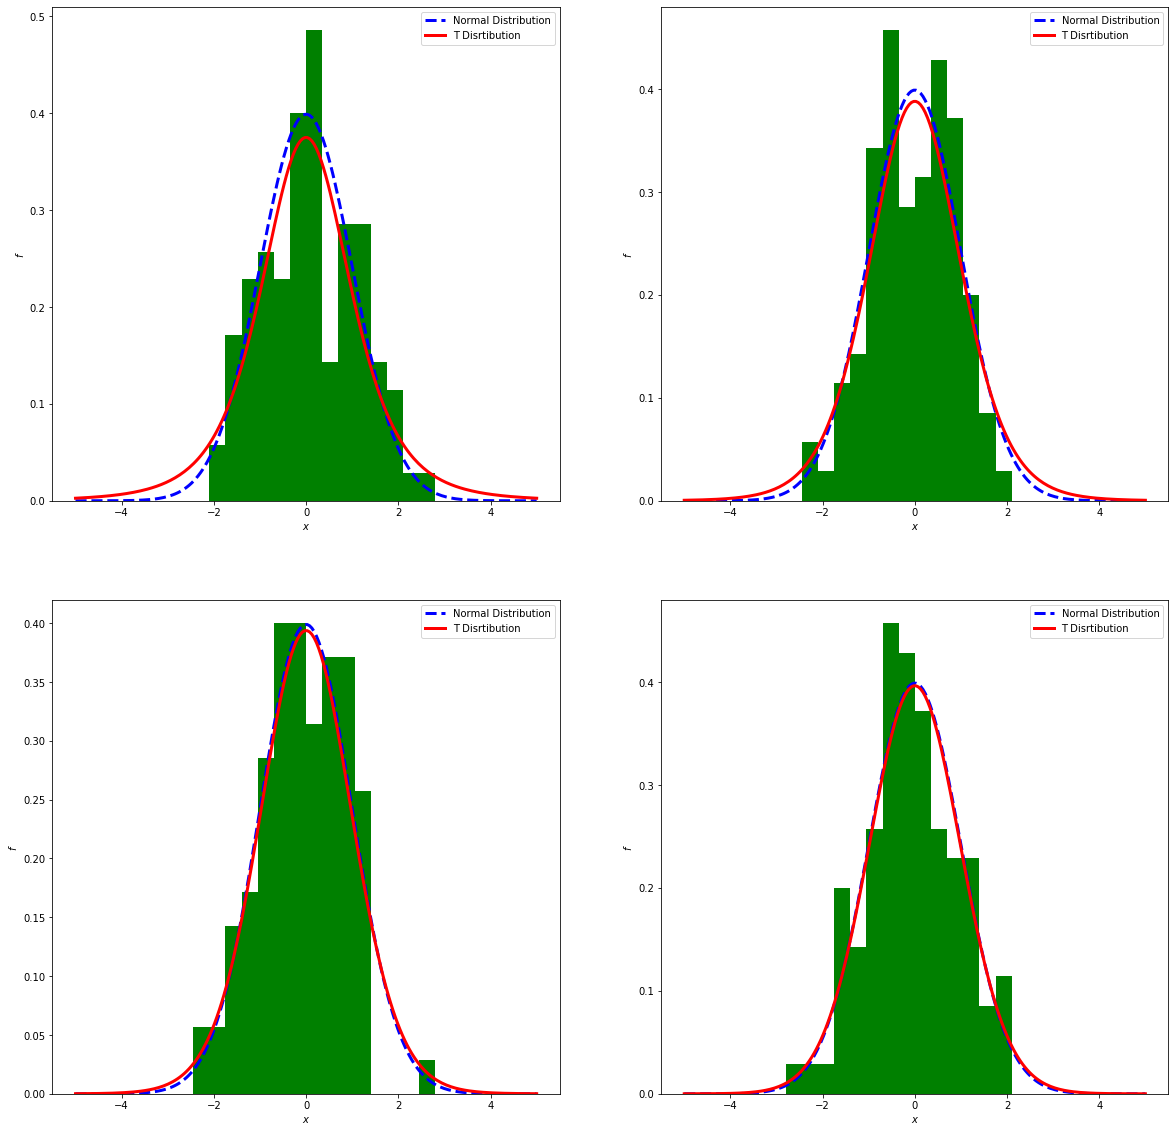

In [62]:
M=100
figure(figsize=(20,20))
subplot(2,2,1)
Z_function(M,5,dataset_2)
subplot(2,2,2)
Z_function(M,10,dataset_2)
subplot(2,2,3)
Z_function(M,20,dataset_2)
subplot(2,2,4)
Z_function(M,40,dataset_2)

# Confidence Intervals

In [68]:
confidence_intervals(80,5,dataset_2)
confidence_intervals(80,10,dataset_2)
confidence_intervals(80,20,dataset_2)
confidence_intervals(80,40,dataset_2)

for n = 5
80% confidence interval of the mean: 75428.0000 +- 39538.9362
Approximate 80% confidence interval of the mean: 75428.0000 +- 33049.1640
for n = 10
80% confidence interval of the mean: 31343.1000 +- 20155.2219
Approximate 80% confidence interval of the mean: 31343.1000 +- 18676.3698
for n = 20
80% confidence interval of the mean: 61648.6000 +- 12591.1017
Approximate 80% confidence interval of the mean: 61648.6000 +- 12153.1997
for n = 40
80% confidence interval of the mean: 62107.7250 +- 10429.4311
Approximate 80% confidence interval of the mean: 62107.7250 +- 10252.7294


In [70]:
confidence_intervals(95,5,dataset_2)
confidence_intervals(95,10,dataset_2)
confidence_intervals(95,20,dataset_2)
confidence_intervals(95,40,dataset_2)

for n = 5
95% confidence interval of the mean: 46038.0000 +- 69421.4825
Approximate 95% confidence interval of the mean: 46038.0000 +- 49006.4094
for n = 10
95% confidence interval of the mean: 52742.3000 +- 32659.1814
Approximate 95% confidence interval of the mean: 52742.3000 +- 28296.3626
for n = 20
95% confidence interval of the mean: 50727.8000 +- 19782.0744
Approximate 95% confidence interval of the mean: 50727.8000 +- 18524.4662
for n = 40
95% confidence interval of the mean: 63158.0500 +- 14218.4142
Approximate 95% confidence interval of the mean: 63158.0500 +- 13777.4781


In [71]:
confidence_intervals(99,5,dataset_2)
confidence_intervals(99,10,dataset_2)
confidence_intervals(99,20,dataset_2)
confidence_intervals(99,40,dataset_2)

for n = 5
99% confidence interval of the mean: 91203.4000 +- 102231.7807
Approximate 99% confidence interval of the mean: 91203.4000 +- 57195.0891
for n = 10
99% confidence interval of the mean: 89589.6000 +- 36415.0539
Approximate 99% confidence interval of the mean: 89589.6000 +- 28862.6798
for n = 20
99% confidence interval of the mean: 41635.4500 +- 24700.6638
Approximate 99% confidence interval of the mean: 41635.4500 +- 22239.1289
for n = 40
99% confidence interval of the mean: 52910.2000 +- 20632.4280
Approximate 99% confidence interval of the mean: 52910.2000 +- 19626.0401


For a fixed value of n as the pecentage of confidence interval increases the length of the confidence interval also increases. when we increse the value of n the length of confidence interval decreases . it is expected as the confidence interval is inversally proportional to the square root of the value of n

# Box plot discussion

In [109]:
percentile_25, median_data, percentile_75 = np.percentile(dataset_2, [25, 50, 75]) 
print("Median of dataset = {}".format(median_data))
print("25th and 75th percentile of dataset = {}, {}".format(percentile_25,percentile_75))
iqr_data = percentile_75 - percentile_25 
print("Interquartile range of dataset = {}".format(iqr_data))


Median of dataset = 73437.0
25th and 75th percentile of dataset = 3173.0, 93495.0
Interquartile range of dataset = 90322.0


In [123]:
confidence_range(80,40,dataset_2)
confidence_range(85,40,dataset_2)
confidence_range(99,40,dataset_2)

range of mean (57142.40793172889,75377.79206827113)in 80 ci
range of mean (47439.679811842776,66700.32018815723)in 85 ci
range of mean (39299.496443767806,82587.70355623218)in 99 ci


As the percentage of confidence interval increases the range of mean increases and when we computed 99 percent confidence interval the approximate limits of the range are the 25 and 75 percentile of the dataset or we can say the whole range lies between the 25 and 75 percentile whether it is 80 percent or 90 percent or 99 percent

# Verifying CI

In [80]:
verify_CI(100,40,80,dataset_2)
verify_CI(100,40,95,dataset_2)
verify_CI(100,40,99,dataset_2)

Fraction of experiments where true mean lies in 80% confidence interval =0.83
Fraction of experiments where true mean lies in approximate 80% confidence interval =0.82
Fraction of experiments where true mean lies in 95% confidence interval =0.92
Fraction of experiments where true mean lies in approximate 95% confidence interval =0.92
Fraction of experiments where true mean lies in 99% confidence interval =0.98
Fraction of experiments where true mean lies in approximate 99% confidence interval =0.97


Yes it is true when we approximate the confidence intervals we get the same results

# Dataset 3

In [82]:
%cd Desktop


C:\Users\hp\Desktop


In [90]:
dataset_=[]
with open("annual_csv.csv",'r') as f:
    for line in f:
        w=line.split(',')
        try:
            dataset_.append(float(w[2])+14.2)
        except ValueError:
            continue

In [96]:
dataset_total=np.array(dataset_)

In [93]:
dataset_3=dataset_total[1::2]

In [97]:
true_mean_3=np.mean(dataset_3)
true_std_3=np.std(dataset_3,ddof=1)
print("Mean of the Dataset = {:.4f}".format(true_mean_3))
print("Standard Deviation of the Dataset ={:.4f}".format(true_std_3))

Mean of the Dataset = 14.2244
Standard Deviation of the Dataset =0.3271


Text(0, 0.5, 'Data Values')

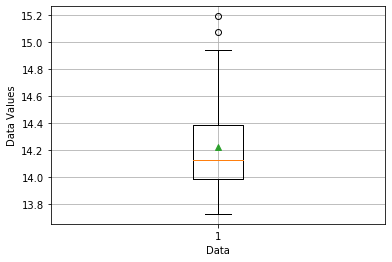

In [98]:
plt.boxplot(dataset_3,showmeans=True)
plt.grid()
plt.xlabel("Data")
plt.ylabel("Data Values")


# Sampling Data

In [99]:
n_samples = 40 
mean_sample_3, std_sample_3 = Sample_from_data(dataset_3, n_samples)
print("Sample and True mean = {}, {}".format(mean_sample_3, true_mean_3)) 
print("Sample and True standard deviation = {}, {}".format(std_sample_3,true_std_3))

Sample and True mean = 14.274750000000001, 14.224379562043795
Sample and True standard deviation = 0.31312926643800015, 0.32711947204497516


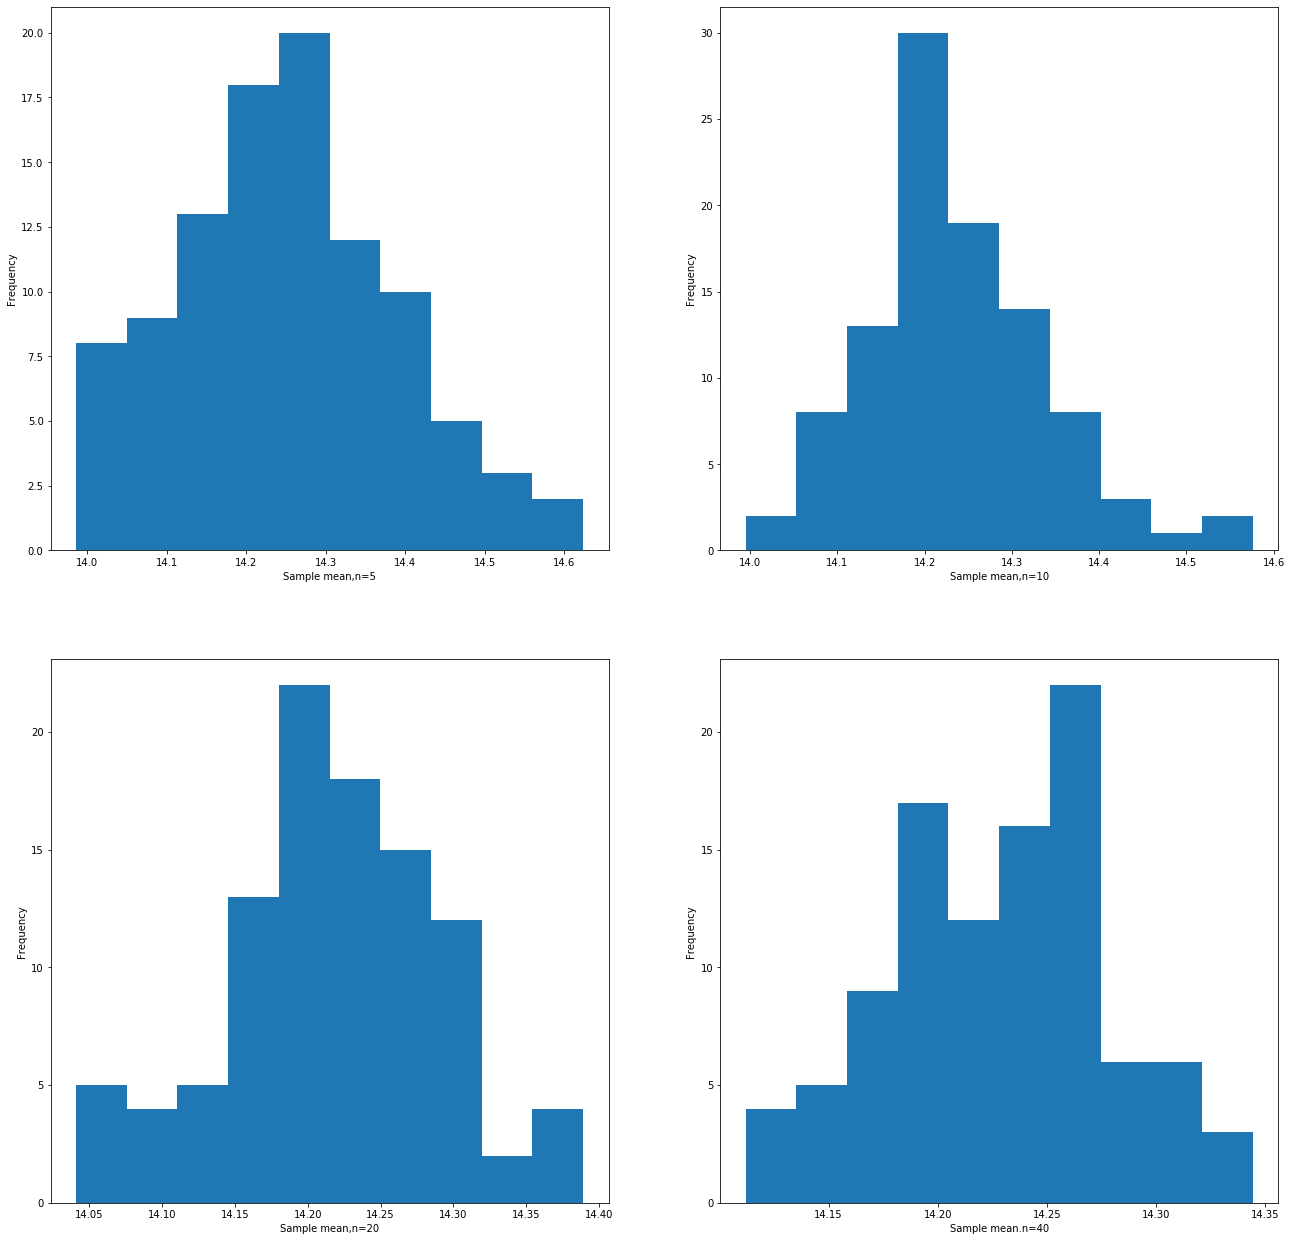

In [100]:
figure(figsize=(22,22))
subplot(2,2,1)
plt.xlabel('Sample mean,n=5') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,5,dataset_3));
subplot(2,2,2)
plt.xlabel('Sample mean,n=10') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,10,dataset_3));
subplot(2,2,3)
plt.xlabel('Sample mean,n=20') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,20,dataset_3));
subplot(2,2,4)
plt.xlabel('Sample mean.n=40') 
plt.ylabel('Frequency')
plt.hist(different_iteration(100,40,dataset_3));

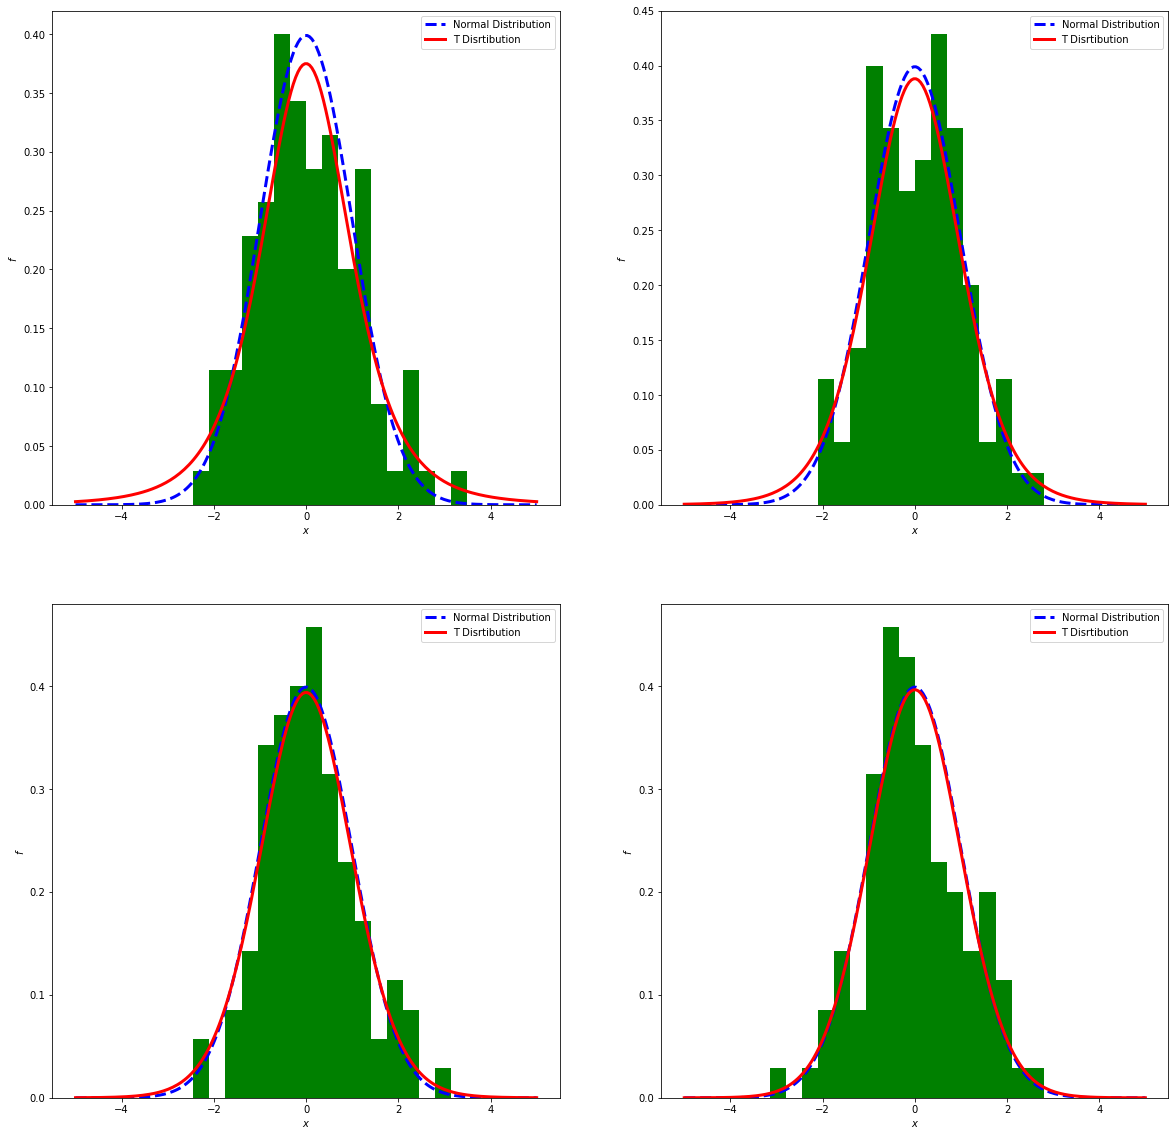

In [101]:
M=100
figure(figsize=(20,20))
subplot(2,2,1)
Z_function(M,5,dataset_3)
subplot(2,2,2)
Z_function(M,10,dataset_3)
subplot(2,2,3)
Z_function(M,20,dataset_3)
subplot(2,2,4)
Z_function(M,40,dataset_3)

# Confidence Intervals

In [103]:
confidence_intervals(80,5,dataset_3)
confidence_intervals(80,10,dataset_3)
confidence_intervals(80,20,dataset_3)
confidence_intervals(80,40,dataset_3)

for n = 5
80% confidence interval of the mean: 14.1400 +- 0.1444
Approximate 80% confidence interval of the mean: 14.1400 +- 0.1207
for n = 10
80% confidence interval of the mean: 14.0580 +- 0.0483
Approximate 80% confidence interval of the mean: 14.0580 +- 0.0448
for n = 20
80% confidence interval of the mean: 14.2020 +- 0.0943
Approximate 80% confidence interval of the mean: 14.2020 +- 0.0910
for n = 40
80% confidence interval of the mean: 14.2585 +- 0.0743
Approximate 80% confidence interval of the mean: 14.2585 +- 0.0730


In [104]:
confidence_intervals(95,5,dataset_3)
confidence_intervals(95,10,dataset_3)
confidence_intervals(95,20,dataset_3)
confidence_intervals(95,40,dataset_3)

for n = 5
95% confidence interval of the mean: 14.0800 +- 0.3800
Approximate 95% confidence interval of the mean: 14.0800 +- 0.2682
for n = 10
95% confidence interval of the mean: 14.1740 +- 0.2418
Approximate 95% confidence interval of the mean: 14.1740 +- 0.2095
for n = 20
95% confidence interval of the mean: 14.2060 +- 0.1659
Approximate 95% confidence interval of the mean: 14.2060 +- 0.1553
for n = 40
95% confidence interval of the mean: 14.2322 +- 0.0921
Approximate 95% confidence interval of the mean: 14.2322 +- 0.0892


In [102]:
confidence_intervals(99,5,dataset_3)
confidence_intervals(99,10,dataset_3)
confidence_intervals(99,20,dataset_3)
confidence_intervals(99,40,dataset_3)

for n = 5
99% confidence interval of the mean: 14.3580 +- 0.6723
Approximate 99% confidence interval of the mean: 14.3580 +- 0.3761
for n = 10
99% confidence interval of the mean: 14.1770 +- 0.3141
Approximate 99% confidence interval of the mean: 14.1770 +- 0.2490
for n = 20
99% confidence interval of the mean: 14.1775 +- 0.1953
Approximate 99% confidence interval of the mean: 14.1775 +- 0.1758
for n = 40
99% confidence interval of the mean: 14.2645 +- 0.1476
Approximate 99% confidence interval of the mean: 14.2645 +- 0.1404


For a fixed value of n as the pecentage of confidence interval
increases the length of the confidence interval also increases.
when we increse the value of n the length of confidence interval 
decreases . it is expected as the confidence interval is 
inversally proportional to the square root of the value of n

# Box plot discussion

In [107]:
percentile_25, median_data, percentile_75 = np.percentile(dataset_3, [25, 50, 75]) 
print("Median of dataset = {}".format(median_data))
print("25th and 75th percentile of dataset = {}, {}".format(percentile_25,percentile_75))
iqr_data = percentile_75 - percentile_25 
print("Interquartile range of dataset = {}".format(iqr_data))


Median of dataset = 14.129999999999999
25th and 75th percentile of dataset = 13.989999999999998, 14.389999999999999
Interquartile range of dataset = 0.40000000000000036


In [116]:
confidence_range(80,20,dataset_3)
confidence_range(90,20,dataset_3)
confidence_range(99,20,dataset_3)

range of mean (14.153217198480316,14.358782801519684)in 80 ci
range of mean (14.174835880186064,14.420164119813935)in 90 ci
range of mean (13.97292369881604,14.44007630118396)in 99 ci


As the percentage of confidence interval increases the range of mean increases and when we computed 
99 percent confidence interval the limits of the range are the 25 and 75 percentile of the dataset. We can say the whole range lies between the 25 and 75 percentile whether it is 80 
percent or 90 percent or 99 percent

# Verifying CI

In [105]:
verify_CI(100,40,80,dataset_3)
verify_CI(100,40,95,dataset_3)
verify_CI(100,40,99,dataset_3)

Fraction of experiments where true mean lies in 80% confidence interval =0.83
Fraction of experiments where true mean lies in approximate 80% confidence interval =0.83
Fraction of experiments where true mean lies in 95% confidence interval =0.96
Fraction of experiments where true mean lies in approximate 95% confidence interval =0.96
Fraction of experiments where true mean lies in 99% confidence interval =0.98
Fraction of experiments where true mean lies in approximate 99% confidence interval =0.95


Yes it is true when we approximate the confidence intervals we get the same results 